In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from parksim.intent_predict.irl.data_processing.utils import IrlDataLoader
from parksim.intent_predict.irl.optimizer import WeightOptimizer, DecisionMaker

np.random.seed(1)

In [2]:
# Load data
file_path = 'data/DJI_0012'
irl_dataset = IrlDataLoader(file_path)

In [3]:
mu_e = 0
for feature, label in irl_dataset:
    mu_e += feature @ label

mu_e /= len(irl_dataset)

mu_list = []
t_list = []
w = np.random.randn(mu_e.shape[0])
all_w = w.copy()

decision_maker = DecisionMaker()
weight_opti = WeightOptimizer(mu_e)

print("Start Training...")
for feature, label in tqdm(irl_dataset):
    p, _, _ = decision_maker.solve(w=w, phi=feature)
    
    mu = feature @ p
    mu_list.append(mu)

    t, w = weight_opti.solve(mu_list)
    w /= np.linalg.norm(w)

    t_list.append(t)
    all_w = np.vstack([all_w, w])

  3%|▎         | 8/275 [00:00<00:03, 71.18it/s]

Start Training...


100%|██████████| 275/275 [00:24<00:00, 11.13it/s]


Text(0.5, 1.0, 'Error of the value function')

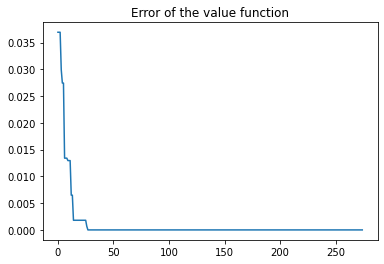

In [4]:
fig = plt.figure()

plt.plot(t_list)
plt.title("Error of the value function")

Final w: [ 0.38528926 -0.00939085 -0.82782104 -0.40513985  0.02733463  0.03592842]


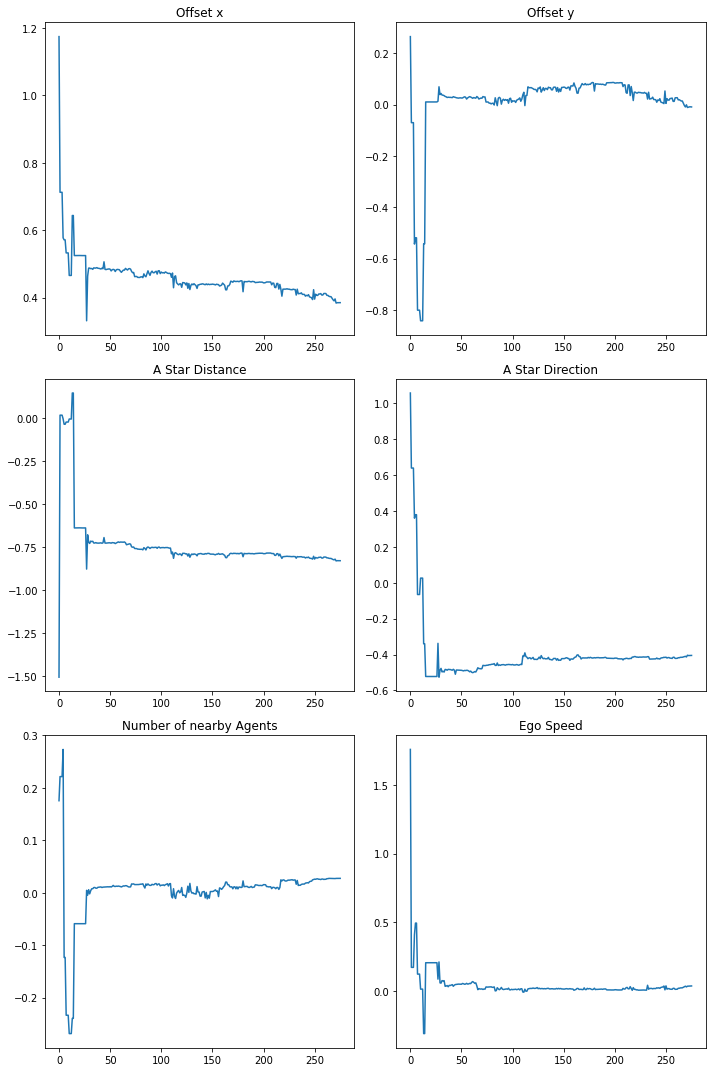

In [5]:
print("Final w:", all_w[-1, :])

fig = plt.figure(figsize=(10, 15))

ax1 = plt.subplot(3,2,1)
ax1.plot(all_w[:, 0])
ax1.set_title('Offset x')

ax2 = plt.subplot(3,2,2)
ax2.plot(all_w[:, 1])
ax2.set_title('Offset y')

ax3 = plt.subplot(3,2,3)
ax3.plot(all_w[:, 2])
ax3.set_title('A Star Distance')

ax4 = plt.subplot(3,2,4)
ax4.plot(all_w[:, 3])
ax4.set_title('A Star Direction')

ax5 = plt.subplot(3,2,5)
ax5.plot(all_w[:, 4])
ax5.set_title('Number of nearby Agents')

ax6 = plt.subplot(3,2,6)
ax6.plot(all_w[:, 5])
ax6.set_title('Ego Speed')

plt.tight_layout()